# Seperating stock to forcast for certain dates depending on the product

In [6]:
%pip install nbformat


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# # import datasets and transformations (reusability purposes)
# from IPython import get_ipython

# get_ipython().run_line_magic('run', 'datasets.ipynb')

In [9]:
import sys
sys.path.append('../src')

In [10]:
from data_config import ProductHandler as ph

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:7: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:9: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:12: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:102: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/../src/datasets.py:104: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

In [11]:
ph.custom_prod_set()

All custom codes for existing products: 
{'607', 'AZG', '68Z', 'MIK', '626', '371', '33U', '402', '532', '52Y', '838', 'MAZ', 'NS-', '11U', '373', '687', '71Z', '52X', 'TUL', 'STB', 'DRE', '022', '169', '614', 'DJB', '156', 'AGS', 'CW-', '33Y', 'THN', '05X', 'INF', '665', '856', '007', '55V', '681', '253', '439', '19T', '408', '7-0', '581', '71U', '089', '520', '955', '128', '321', 'TMC', '291', 'Q-0', '81X', '738', '02X', '094', 'RC-', '12U', 'Y-3', 'IG-', '02T', '374', '118', '657', '664', '73X', '512', '690', 'SSW', '783', 'REN', '361', '827', '91X', '-04', 'PCP', '18Y', 'J-T', 'R-F', '413', 'PRT', '412', 'OWL', '68U', '772', 'TRI', '45R', '579', 'ON-', 'WB-', '85Y', 'MF-', '573', '41T', '203', '91U', '256', '749', '957', '26W', '940', '65W', 'TIP', 'IT-', '570', '952', '201', '680', '618', '366', 'X-4', '09S', 'R-A', '274', 'BLO', '414', '59Z', '279', '58X', 'UN-', '072', 'LJC', '14Z', '285', '3X-', '21U', 'TOG', '255', '640', '249', '46V', '735', '050', 'FLB', '72S', '67Z', 'TRO',

In [12]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('UND'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

UND


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


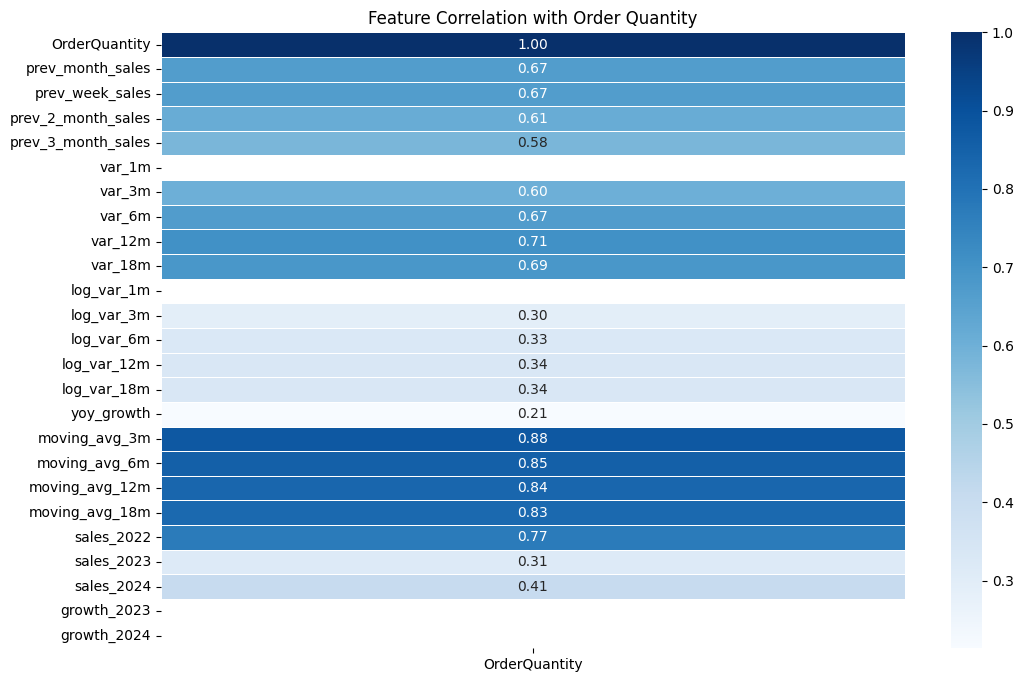

In [14]:
ph.feature_importance(custom_code_df)

In [15]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
UND-026-0008Z 49    UND-026-0008Z         320000  3.890424
UND-026-0012Z 191   UND-026-0012Z        2224000  3.164748
UND-026-0015Z 324   UND-026-0015Z         380000  3.186842
              362   UND-026-0015Z         408000  3.561399
UND-026-0016Y 381   UND-026-0016Y         320000  4.035946
UND-026-0020Z 514   UND-026-0020Z         360000  4.646387
UND-026-0022Z 558   UND-026-0022Z        1344000  3.518711
UND-026-0024Z 615   UND-026-0024Z         180000  3.049619
UND-026-0031Y 748   UND-026-0031Y        1080000  3.225644
              749   UND-026-0031Y        1040000  3.048499
UND-026-0036Z 942   UND-026-0036Z         180000  3.483565
UND-026-0037Z 983   UND-026-0037Z         296000  5.443305
UND-026-0049Y 1223  UND-026-0049Y         140000  3.952076
UND-026-0055Y 1302  UND-026-0055Y         234000  3.166945
UND

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_62804/1363007664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [18]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()


Train Shape: (2812, 260), Validation Shape: (704, 260)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [19]:
# the top 10 (or change) products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(1)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

unique_order_years = custom_code_df['order_year'].unique()
print(unique_order_years)

[2022 2024 2023 2021 2025]


In [20]:
# define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
tp_X = top_prods_df[features]  # Features from top products
tp_y = top_prods_df[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(tp_X, tp_y, test_size=0.2, random_state=42)

# Transform the features
tp_X_train_transformed = preprocessor.fit_transform(tp_X_train)
tp_X_val_transformed = preprocessor.transform(tp_X_val)

# Output the shape
print(f"Train Shape: {tp_X_train_transformed.shape}, Validation Shape: {tp_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")


Train Shape: (24, 21), Validation Shape: (7, 21)
Feature processing for top products completed successfully!


In [21]:
from sklearn.ensemble import RandomForestRegressor
from model_utils import *

In [22]:
# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [23]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [24]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(rf, X_train_scaled, y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(rf, X_val_scaled, y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 39851.3323
Mean Squared Error (MSE): 32093426144.3573
Root Mean Squared Error (RMSE): 179146.3819
R-squared (R²): 0.7308
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 44238.1723
Mean Squared Error (MSE): 23050537966.5167
Root Mean Squared Error (RMSE): 151824.0362
R-squared (R²): 0.7285
--------------------------------------------


In [25]:
# train the model with scaled features (Random Forest Regressor) - TOTAL CUSTOM PRODUCTS IMPLEMENTATION
total_rf = RandomForestRegressor()
total_rf_params = find_best_hyperparameters(total_rf, param_grids(total_rf.__class__.__name__), total_X_train_transformed, total_y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [26]:
total_rf = RandomForestRegressor(**total_rf_params)
total_rf.fit(total_X_train_transformed, total_y_train)
total_y_pred_rf = total_rf.predict(total_X_val_transformed)

In [27]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_train_transformed, total_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_val_transformed, total_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 39200.5623
Mean Squared Error (MSE): 30908828967.8865
Root Mean Squared Error (RMSE): 175809.0696
R-squared (R²): 0.7407
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Evaluating model...
Model: RandomForestRegressor
Mean Absolute Error (MAE): 44301.2022
Mean Squared Error (MSE): 23329170940.7352
Root Mean Squared Error (RMSE): 152738.8979
R-squared (R²): 0.7252
--------------------------------------------


[54263.81340881341, 95388.17316017317, 126561.3520923521, 165449.05855255856, 114025.16572316572, 94558.96769896768, 47950.80656185919, 135196.19191919192, 67149.98440448439, 123756.48673548676, 901170.0693195692, 68118.05416805418, 21350.544011544014, 197174.0245105771, 20078.47619047619, 77472.09020717847, 15980.586413586412, 21774.523809523806, 21623.076645576646, 1198479.7622932624, 74942.76667776669, 354740.86582698347, 72416.17332667332, 29588.317793317794, 278983.34776334773, 20134.666666666664, 24219.66666666667, 31575.39405039405, 51988.02808302808, 1020225.2136752136, 35112.694083694085, 67732.85064935064, 32386.68187368187, 28266.678377178378, 73055.7960927961, 20000.0, 72360.35420135419, 716279.5773115772, 31866.730158730155, 27537.207070707074, 677180.875934523, 94529.96825396824, 43561.301704143814, 45741.33048977167, 69533.03829503829, 84250.42757242758, 58822.32856032857, 53301.619991119995, 72152.32356532358, 34451.23182373182, 392749.2434232434, 847561.4814629812, 142

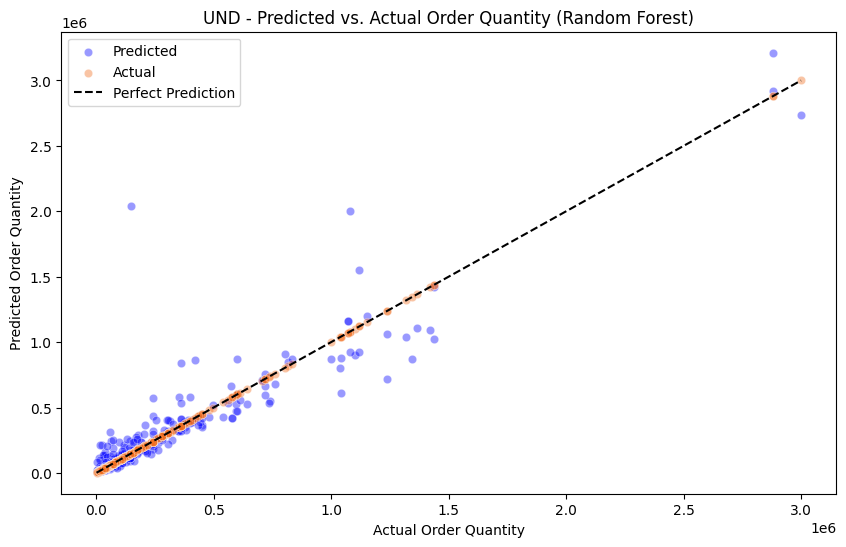

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_pred_rf.tolist())

plt.figure(figsize=(10, 6))

# scatter plot, actual vs predicted values
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.4, color='blue', label='Predicted')  # Predicted values in blue

# actual values in red
sns.scatterplot(x=y_val, y=y_val, alpha=0.4, color='#f26d1d', label='Actual')

# reference line for perfect prediction
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='black', label="Perfect Prediction")

plt.xlabel("Actual Order Quantity")
plt.ylabel("Predicted Order Quantity")
plt.title(f"{custom_ref} - Predicted vs. Actual Order Quantity (Random Forest)")
plt.legend()

plt.show()

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_62804/1606837329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))


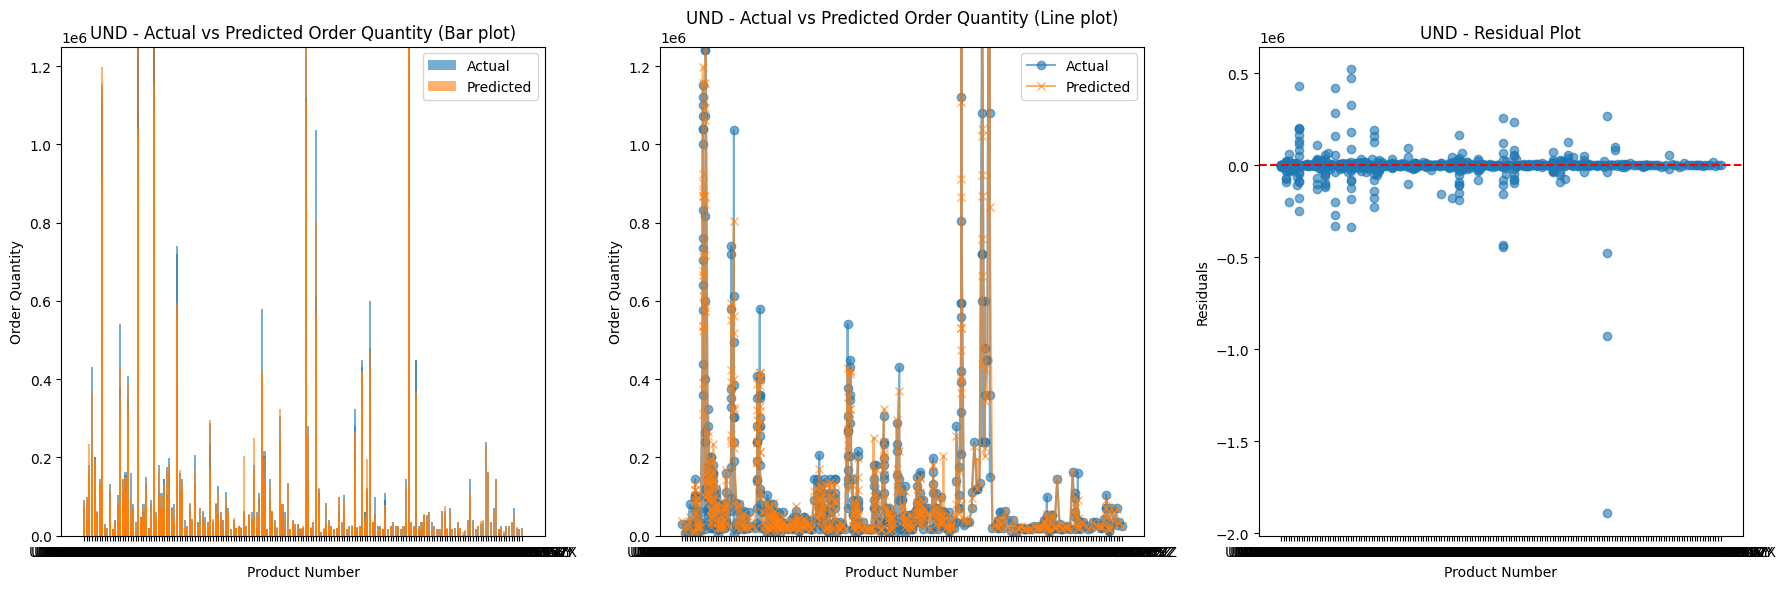

In [29]:
# Convert order year and month to datetime format
top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
top_prods_df = top_prods_df.sort_values(by='OrderDate')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Bar plot)')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# Line plot, actual and predicted values
sorted_indices = df.loc[y_val.index, 'ProductNumber'].argsort()
sorted_products = df.loc[y_val.index, 'ProductNumber'].iloc[sorted_indices]
sorted_actual = y_val.iloc[sorted_indices]
sorted_predicted = y_pred_rf[sorted_indices]

axes[1].plot(sorted_products, sorted_actual, label='Actual', alpha=0.6, marker='o')
axes[1].plot(sorted_products, sorted_predicted, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Line plot)')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# Residual plot
residuals = y_val - y_pred_rf
axes[2].scatter(df.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot')

plt.tight_layout()
plt.show()


In [30]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

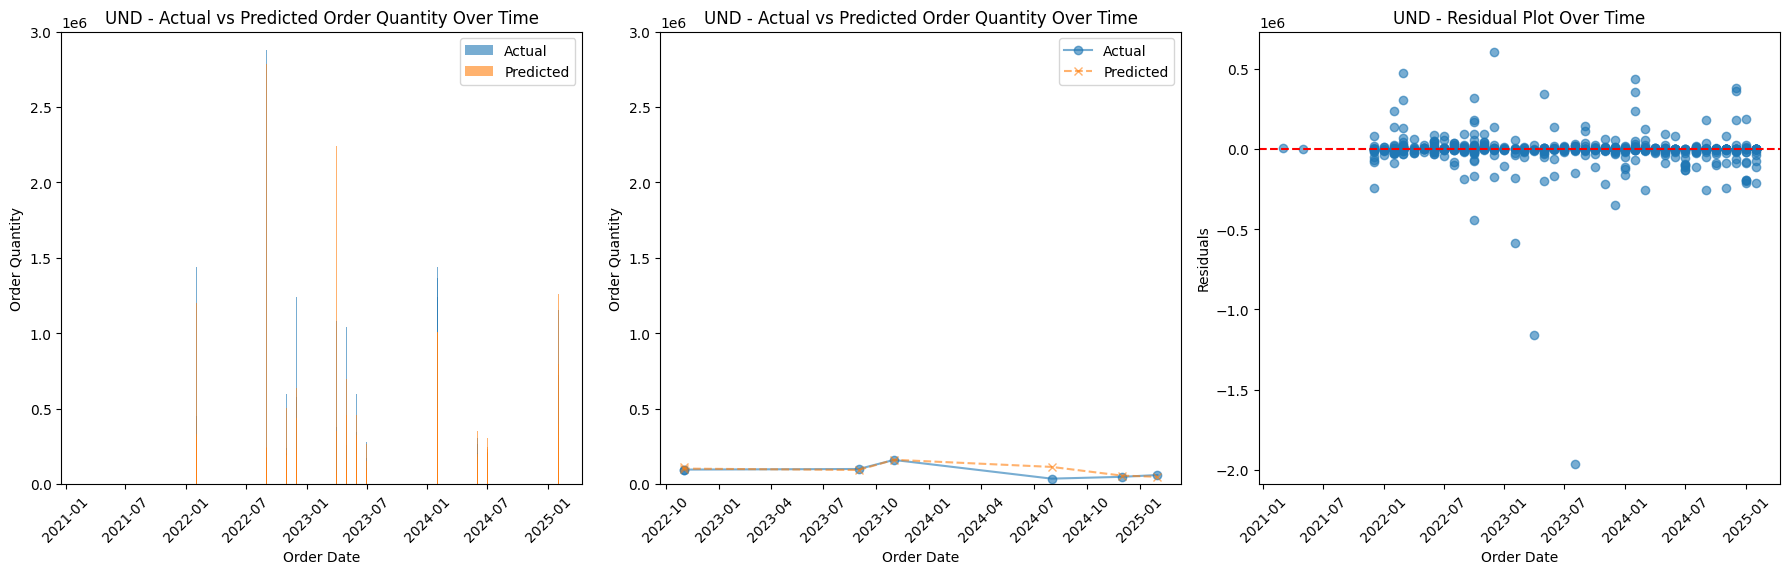

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[0].set_ylim(0, 3000000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Line plot, actual and predicted values over time
sorted_indices = top_prods_df.loc[tp_y_val.index, 'OrderDate'].argsort()
sorted_dates = top_prods_df.loc[tp_y_val.index, 'OrderDate'].iloc[sorted_indices]
sorted_actual = total_y_val.iloc[sorted_indices]
sorted_predicted = total_y_pred_rf[sorted_indices]

axes[1].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[1].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[1].set_xlabel('Order Date')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[1].set_ylim(0, 3000000)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Residual plot over time
residuals = total_y_val - total_y_pred_rf
axes[2].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Order Date')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot Over Time')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [32]:
# # to see dataframe structure
# customer_total.head()


In [33]:
# # to see prediction nparray structure
# total_y_pred_rf

In [34]:
# # Group data by OrderDate and sum the relevant numerical columns
# customer_total = top_prods_df.groupby('OrderDate').sum(numeric_only=True).reset_index()

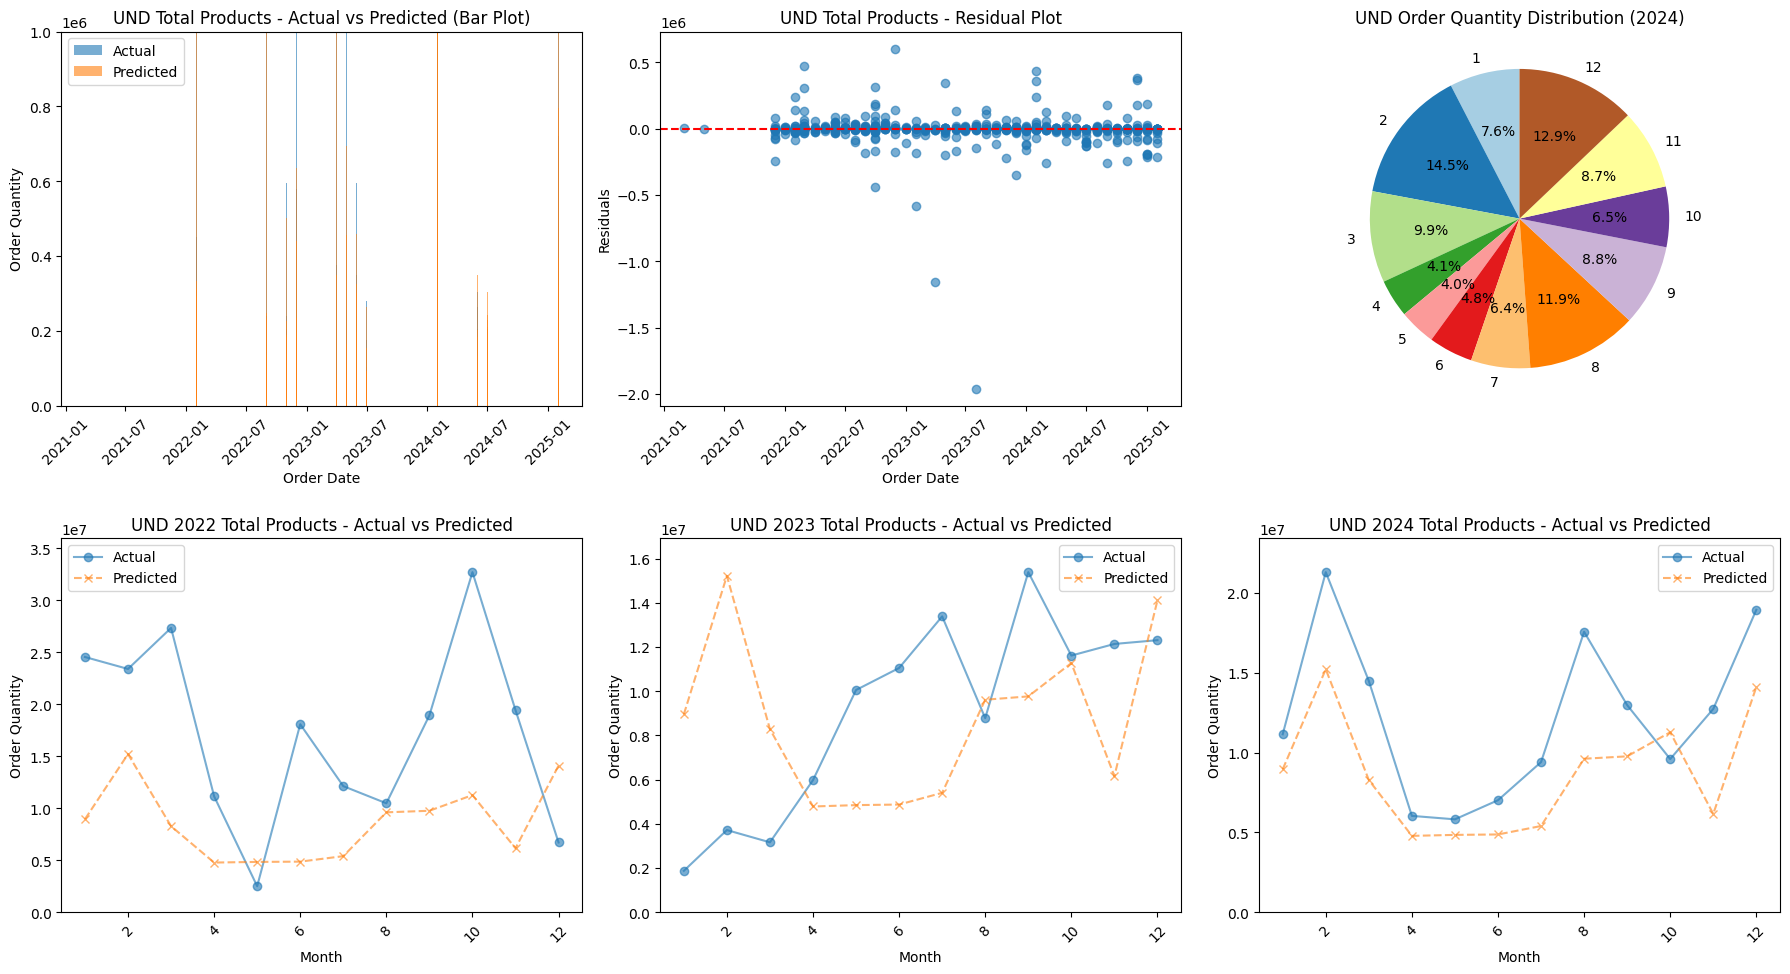

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust layout for better spacing

# Bar plot: Actual vs. Predicted Order Quantity
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Residual Plot
residuals = total_y_val - total_y_pred_rf
axes[0, 1].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# Pie Chart: Order Quantity per Month (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024].groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(order_2024, labels=order_2024.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]

    if yearly_df.empty:
        continue  # skip if no data for that year

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert total_y_pred_rf to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_pred_rf, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot actual and predicted values for the year
    axes[1, i].plot(monthly_actual.index, monthly_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
    axes[1, i].plot(monthly_predicted.index, monthly_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')

    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)  # Scale Y axis
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


In [36]:
has_orders_2022 = not customer_total[customer_total['order_year'] == 2022].empty
print(f"Orders in 2022 exist: {has_orders_2022}")


Orders in 2022 exist: True


In [37]:
customer_total.head(10)

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2494,UND-026-0107Z,2021,3,9,0,0,194.0,36000,168000.0,168000.0,...,193000.000000,159000.000000,138000.000000,0,0,0,NaN,NaN,18000,2021-03-01
2644,UND-026-0114Z,2021,3,9,2,0,194.0,36000,40000.0,40000.0,...,35333.333333,26000.000000,24470.588235,0,0,0,NaN,NaN,0,2021-03-01
1849,UND-026-0086Z,2021,3,9,0,0,194.0,144000,72000.0,72000.0,...,132000.000000,99000.000000,132666.666667,0,0,0,NaN,NaN,144000,2021-03-01
3070,UND-026-0151Z,2021,5,20,2,0,194.0,180000,18000.0,18000.0,...,72000.000000,45818.181818,45818.181818,0,0,0,NaN,NaN,0,2021-05-01
2789,UND-026-0124Z,2021,5,20,4,0,194.0,28000,28000.0,28000.0,...,29750.000000,29750.000000,29750.000000,0,0,0,NaN,NaN,0,2021-05-01
3032,UND-026-0147Z,2021,5,20,2,0,194.0,20000,20000.0,20000.0,...,20000.000000,33000.000000,32000.000000,0,0,0,NaN,NaN,0,2021-05-01
2793,UND-026-0125Z,2021,5,20,4,0,194.0,28000,35000.0,35000.0,...,33250.000000,33250.000000,33250.000000,0,0,0,NaN,NaN,0,2021-05-01
2587,UND-026-0110Y,2021,7,27,1,0,194.0,24000,20000.0,20000.0,...,30666.666667,26400.000000,26400.000000,0,0,0,NaN,NaN,0,2021-07-01
3095,UND-026-0155X,2021,9,36,4,0,194.0,20000,20000.0,20000.0,...,23200.000000,23200.000000,23200.000000,0,0,0,NaN,NaN,0,2021-09-01
360,UND-026-0016Y,2021,11,45,1,0,194.0,120000,140000.0,140000.0,...,120000.000000,105666.666667,101333.333333,0,0,0,NaN,NaN,4000,2021-11-01


In [38]:
# from powerbiclient import QuickVisualize, get_dataset_config, Report
# from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
# import pandas as pd

# prod_sales = pd.read_csv(
#     '/Users/mwilko777/Desktop/Project/Software Artifact/datasets/stock_forecasting/final/product_sales.csv')

# # use DeviceCodeLoginAuthentication if want to sign in each time, else InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication()
# print("Authentication successful.")


# def visual():
#     dataset_config = get_dataset_config(prod_sales)
#     return QuickVisualize(dataset_config, auth)

# visual()

In [39]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2494,UND-026-0107Z,2021,3,9,0,0,194.0,36000,168000.0,168000.0,...,193000.000000,159000.000000,138000.000000,0,0,0,NaN,NaN,18000,2021-03-01
2644,UND-026-0114Z,2021,3,9,2,0,194.0,36000,40000.0,40000.0,...,35333.333333,26000.000000,24470.588235,0,0,0,NaN,NaN,0,2021-03-01
1849,UND-026-0086Z,2021,3,9,0,0,194.0,144000,72000.0,72000.0,...,132000.000000,99000.000000,132666.666667,0,0,0,NaN,NaN,144000,2021-03-01
3070,UND-026-0151Z,2021,5,20,2,0,194.0,180000,18000.0,18000.0,...,72000.000000,45818.181818,45818.181818,0,0,0,NaN,NaN,0,2021-05-01
2789,UND-026-0124Z,2021,5,20,4,0,194.0,28000,28000.0,28000.0,...,29750.000000,29750.000000,29750.000000,0,0,0,NaN,NaN,0,2021-05-01


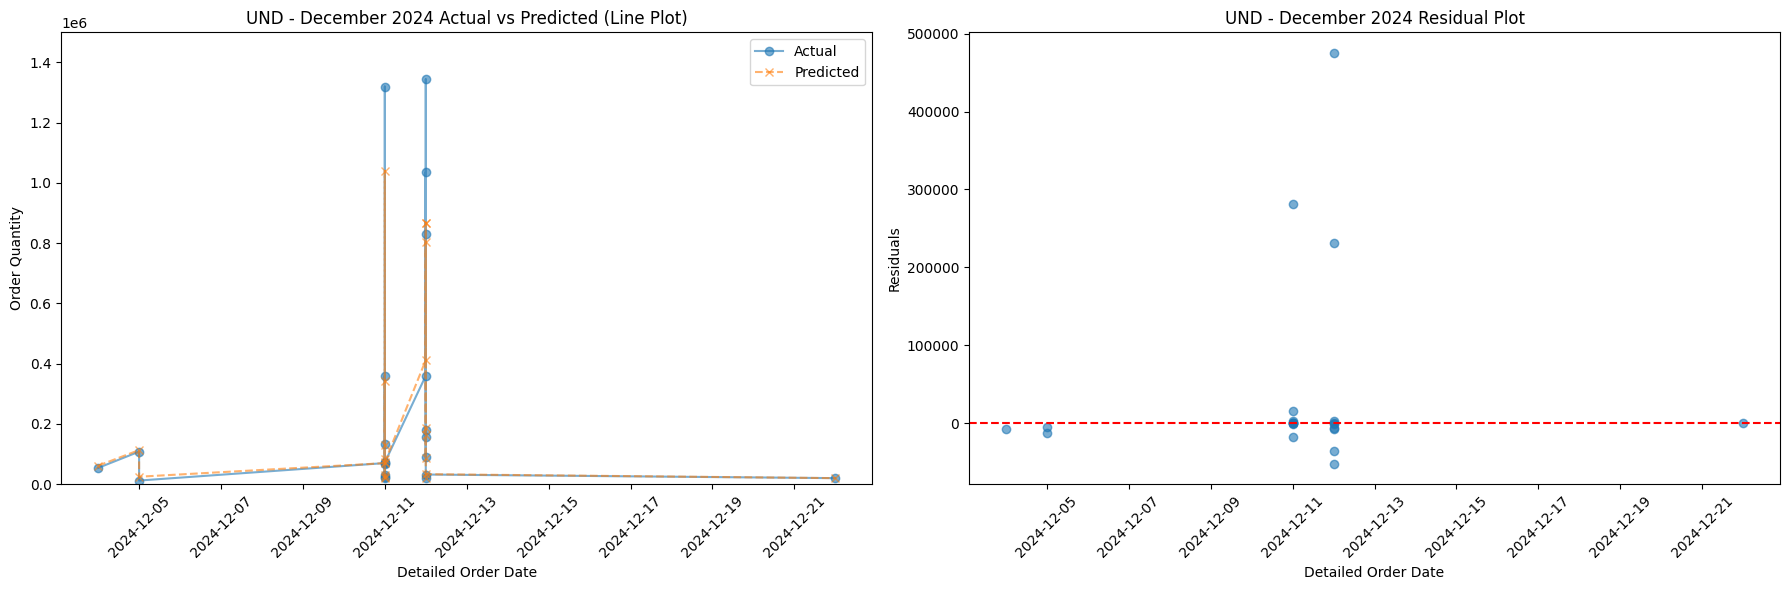

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
customer_total['DetailedOrderDate'] = pd.to_datetime(
    customer_total['order_year'].astype(str) +
    customer_total['order_week'].astype(str).str.zfill(2) +
    customer_total['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = customer_total[
    (customer_total['DetailedOrderDate'].dt.year == 2024) &
    (customer_total['DetailedOrderDate'].dt.month == 12)
]

# Use only the common indices between dec_2024_data and y_val
common_index = dec_2024_data.index.intersection(y_val.index)
dec_2024_actual = y_val.loc[common_index]
# Convert y_pred_rf to a Series for indexing (using the same index as y_val)
y_pred_rf_series = pd.Series(y_pred_rf, index=y_val.index)
dec_2024_predicted = y_pred_rf_series.loc[common_index]

# --- Incorporate your provided sorting snippet, adapted for December 2024 data ---
# Here we sort by DetailedOrderDate from dec_2024_data for the common indices.
sorted_indices = dec_2024_data.loc[common_index, 'DetailedOrderDate'].argsort()
sorted_dates = dec_2024_data.loc[common_index, 'DetailedOrderDate'].iloc[sorted_indices]
sorted_actual = dec_2024_actual.iloc[sorted_indices]
sorted_predicted = dec_2024_predicted.iloc[sorted_indices]
# --- End of sorting snippet ---

# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Line Plot: Actual vs. Predicted Order Quantity using DetailedOrderDate
axes[0].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[0].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[0].set_xlabel('Detailed Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - December 2024 Actual vs Predicted (Line Plot)')
axes[0].set_ylim(0, 1_500_000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Residual Plot for December 2024
residuals_dec_2024 = sorted_actual - sorted_predicted
axes[1].scatter(sorted_dates, residuals_dec_2024, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Detailed Order Date')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'{custom_ref} - December 2024 Residual Plot')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# check dataset shape
print("x_train shape:", X_train.shape)
print("x_val shape:", X_val.shape)

# convert x_train to dataframe if needed
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
    X_val = pd.DataFrame(X_val)

# separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# transform data
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# convert sparse matrices if necessary
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()
    X_val_transformed = X_val_transformed.toarray()

# ensure numpy array format
X_train_scaled = np.array(X_train_transformed)
X_val_scaled = np.array(X_val_transformed)
if X_train_scaled.ndim == 1:
    X_train_scaled = X_train_scaled.reshape(-1, 1)
if X_val_scaled.ndim == 1:
    X_val_scaled = X_val_scaled.reshape(-1, 1)

# define neural network model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, input_dim=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

input_shape = X_train_scaled.shape[1]

# set hyperparameter grid
def param_grids():
    return {
        'epochs': [10, 20, 30],
        'batch_size': [16, 32, 64]
    }

# wrap model for sklearn compatibility
nn_model = KerasRegressor(build_fn=create_nn_model, input_shape=input_shape, verbose=1)

grid_search = RandomizedSearchCV(
    estimator=nn_model, 
    param_distributions=param_grids(),
    n_iter=10, 
    cv=3,
    n_jobs=-1, 
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# train final model with best parameters
nn_params = grid_search.best_params_
best_nn_model = create_nn_model(input_shape)
best_nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

best_nn_model.fit(
    X_train_scaled, y_train,
    epochs=nn_params['epochs'], 
    batch_size=nn_params['batch_size'], 
    validation_split=0.2,
    verbose=1
)

# make predictions
y_pred_nn = best_nn_model.predict(X_val_scaled)

evaluate_model_nn(best_nn_model, X_val_scaled, y_val)

Original X_train shape: (2812, 265)
Original X_val shape: (704, 265)
X_train dtypes:
 0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
260    float64
261    float64
262    float64
263    float64
264    float64
Length: 265, dtype: object
Numerical columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 16

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn

Epoch 1/20
Epoch 1/20
Epoch 1/10
Epoch 1/30
Epoch 1/10
Epoch 1/20
Epoch 1/10
Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 154422951936.0000 - mean_absolute_error: 149262.3750
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118904487936.0000 - mean_absolute_error: 131758.7812
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 171234148352.0000 - mean_absolute_error: 143468.6094
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 113355309056.0000 - mean_absolute_error: 138044.5781
Epoch 2/30
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 93830324224.0000 - mean_absolute_error: 128039.6484
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 181720743936.0000 - mean_absolute_error: 152559.0312
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155842445312.0000 - mean_absolute_error: 149886.3750
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 156794699776.0000 - mean_absolute_error: 141352.3125
Epoch 2/10
Epoch 2/10
118/118 ━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: Us

Epoch 1/10
Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86663405568.0000 - mean_absolute_error: 103660.89846
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125884653568.0000 - mean_absolute_error: 112118.0703
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123715248128.0000 - mean_absolute_error: 112256.5391Epoch 14/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145097048064.0000 - mean_absolute_error: 125590.9062
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122915151872.0000 - mean_absolute_error: 111920.9531  
Epoch 15/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82035679232.0000 - mean_absolute_error: 96989.2812  
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122408534016.0000 - mean_absolute_error: 115295.2500
 51/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 102671138816.0000 - mean_absolute_error: 98967.7812Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74482057216.0000 - mean_absolute_error: 98

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: Us

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214183755776.0000 - mean_absolute_error: 150435.2344
Epoch 10/10
Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120733491200.0000 - mean_absolute_error: 136250.9375
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/steps: 63423557632.0000 - mean_absolute_error: 120557.98
 48/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43847737344.0000 - mean_absolute_error: 63042.9141[CV] END ...........................batch_size=32, epochs=10; total time=   2.5s
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117671239680.0000 - mean_absolute_error: 127775.41412
 89/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49006854144.0000 - mean_absolute_error: 78649.5625

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47178399744.0000 - mean_absolute_error: 77909.18758
Epoch 26/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52098961408.0000 - mean_absolute_error: 68416.57031
Epoch 24/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/stepep - loss: 13512345600.0000 - mean_absolute_error: 62164.33
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116053614592.0000 - mean_absolute_error: 137443.4219
Epoch 8/30
 73/118 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 113126318080.0000 - mean_absolute_error: 86149.3125[CV] END ...........................batch_size=32, epochs=10; total time=   2.8s
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 96735182848.0000 - mean_absolute_error: 82510.7344 
Epoch 25/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26567370752.0000 - mean_absolute_error: 68017.1328
Epoch 27/30
  1/118 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6458158080.0000 - mean_absolute_error: 63156.3789Epoch 1/30906
118/118 ━━━━━━━━━━━━━━━━━━━━ 

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116698882048.0000 - mean_absolute_error: 128370.9844
Epoch 10/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37177368576.0000 - mean_absolute_error: 75489.1406
Epoch 29/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35522658304.0000 - mean_absolute_error: 63432.0352
Epoch 27/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116228702208.0000 - mean_absolute_error: 119459.5234
Epoch 11/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29510293504.0000 - mean_absolute_error: 64983.8867
Epoch 28/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34897805312.0000 - mean_absolute_error: 68563.2188
Epoch 30/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162238332928.0000 - mean_absolute_error: 141232.3750
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118688669696.0000 - mean_absolute_error: 135890.0156
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 171662213120.0000 - mean_absolute_error: 161307.3281
Ep

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55744098304.0000 - mean_absolute_error: 74538.0469
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107048419328.0000 - mean_absolute_error: 131486.0312
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143718416384.0000 - mean_absolute_error: 116894.8984
Epoch 15/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116329603072.0000 - mean_absolute_error: 133768.8750
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119522721792.0000 - mean_absolute_error: 134519.5625
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132167442432.0000 - mean_absolute_error: 140392.8281
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134931668992.0000 - mean_absolute_error: 141688.9062
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115959218176.0000 - mean_absolute_error: 138542.9219 
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72308604928.0000 - mean_absolute_error: 130800.27340
58/59 ━━━━━━━━━━━━━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100042121216.0000 - mean_absolute_error: 133105.0938
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150288154624.0000 - mean_absolute_error: 146226.0156
Epoch 10/20
 1/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 11074256896.0000 - mean_absolute_error: 69070.8203Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143600877568.0000 - mean_absolute_error: 137772.4688
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128613810176.0000 - mean_absolute_error: 143366.9219
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100907982848.0000 - mean_absolute_error: 130857.9062
Epoch 8/30
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157766172672.0000 - mean_absolute_error: 140239.1250
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66496036864.0000 - mean_absolute_error: 86895.7266
Epoch 17/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129026768896.0000 - mean_absolute_error: 135418.6562
Epoch 11/20

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119372029952.0000 - mean_absolute_error: 133934.8281
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157408641024.0000 - mean_absolute_error: 141516.2500
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99741466624.0000 - mean_absolute_error: 133010.1094
 1/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8438614016.0000 - mean_absolute_error: 60652.5781Epoch 14/20
106/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55949393920.0000 - mean_absolute_error: 79745.8516Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57000636416.0000 - mean_absolute_error: 79814.2422
Epoch 19/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123520704512.0000 - mean_absolute_error: 125559.6406
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134273024000.0000 - mean_absolute_error: 143846.0938
Epoch 12/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116707721216.0000 - mean_absolute_error: 126932.7500
Epoch 13/20
59/59 ━━━━━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: Us

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66742632448.0000 - mean_absolute_error: 94737.50782
Epoch 22/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120780144640.0000 - mean_absolute_error: 133068.7344
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131064119296.0000 - mean_absolute_error: 141645.3438
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26855391232.0000 - mean_absolute_error: 59929.6406
Epoch 26/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181963980800.0000 - mean_absolute_error: 137569.9844
Epoch 13/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108418596864.0000 - mean_absolute_error: 116862.9453
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93939220480.0000 - mean_absolute_error: 103740.34389
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 134761218048.0000 - mean_absolute_error: 145090.7031
Epoch 23/30
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112464912384.0000 - mean_absolute_error: 122257.4609
Epoch 12/30
118/118

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151801364480.0000 - mean_absolute_error: 135024.0156  
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142577106944.0000 - mean_absolute_error: 147509.0938
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139036147712.0000 - mean_absolute_error: 127479.8594
Epoch 16/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58943221760.0000 - mean_absolute_error: 82953.6250
Epoch 25/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128909828096.0000 - mean_absolute_error: 140603.0312
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118055952384.0000 - mean_absolute_error: 123822.6328
Epoch 15/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48971018240.0000 - mean_absolute_error: 73439.8438
Epoch 29/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102252142592.0000 - mean_absolute_error: 120282.9688
Epoch 17/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 4504195584.0000 - mean_absolute_error: 48211.835406
 1/59 ━━━━━━━━━━━━━━━━━━━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56963809280.0000 - mean_absolute_error: 79676.1953  
Epoch 27/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118160867328.0000 - mean_absolute_error: 113409.58596 
Epoch 17/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103652122624.0000 - mean_absolute_error: 118760.8359
Epoch 19/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 115477266432.0000 - mean_absolute_error: 133535.3438
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56352346112.0000 - mean_absolute_error: 78663.28912
Epoch 28/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44636876800.0000 - mean_absolute_error: 67213.0547
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177275797504.0000 - mean_absolute_error: 145233.7812
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93455630336.0000 - mean_absolute_error: 112431.0625
Epoch 18/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 111985139712.0000 - mean_absolute_error: 135899.5625
Epoch 2/10
30/30 ━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55630553088.0000 - mean_absolute_error: 95905.945350
Epoch 20/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154905329664.0000 - mean_absolute_error: 151299.5469
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169378054144.0000 - mean_absolute_error: 145784.6406 
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42033553408.0000 - mean_absolute_error: 70617.1875
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167074119680.0000 - mean_absolute_error: 149035.9844
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97914748928.0000 - mean_absolute_error: 102668.75002
12/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 176916332544.0000 - mean_absolute_error: 158542.5312Epoch 22/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114803982336.0000 - mean_absolute_error: 140898.9844
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43094511616.0000 - mean_absolute_error: 87391.71094 
Epoch 21/30
30/30 ━━━━━━━━━━━━━━━━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167831519232.0000 - mean_absolute_error: 143798.7969
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111960178688.0000 - mean_absolute_error: 139795.9688
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58682765312.0000 - mean_absolute_error: 97973.5781
Epoch 22/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133552480256.0000 - mean_absolute_error: 136370.0625
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 143634169856.0000 - mean_absolute_error: 144599.8438 
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169121218560.0000 - mean_absolute_error: 140805.9375
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128718028800.0000 - mean_absolute_error: 144364.1406
57/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119379550208.0000 - mean_absolute_error: 102980.0234Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133345861632.0000 - mean_absolute_error: 135228.5312
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━

/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: Us

56/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72341004288.0000 - mean_absolute_error: 88399.7500Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74360766464.0000 - mean_absolute_error: 89048.585906  
Epoch 26/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146949914624.0000 - mean_absolute_error: 138965.4688
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142716977152.0000 - mean_absolute_error: 142758.0312
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71566237696.0000 - mean_absolute_error: 84877.4453
Epoch 25/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 155795144704.0000 - mean_absolute_error: 146148.2188
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113863565312.0000 - mean_absolute_error: 139639.1094
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178419220480.0000 - mean_absolute_error: 151751.5938
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105722961920.0000 - mean_absolute_error: 95498.5938
Epoch 27/30


/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - loss: 138000171008.0000 - mean_absolute_error: 139541.8750
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 167209205760.0000 - mean_absolute_error: 146820.4219
Epoch 3/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 119805640704.0000 - mean_absolute_error: 138536.5625
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 105687195648.0000 - mean_absolute_error: 130882.1172
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 110595342336.0000 - mean_absolute_error: 128293.6641
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 131908902912.0000 - mean_absolute_error: 134460.4844
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 105673531392.0000 - mean_absolute_error: 123875.6641
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 144604954624.0000 - mean_absolute_error: 127757.5391
Epoch 9/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 105047613440.0000 - mean_abso

{'MAE': 82277.56333396652,
 'MSE': 28738356092.727066,
 'RMSE': 169523.91009154747,
 'R²': 0.661528468132019}